# Vehicle Sales Data

In [1]:
# Installing the necessary libraries
!pip -q install -U pandas numpy openpyxl rich plotly nbformat scikit-learn scipy seaborn statsmodels prophet keras tensorflow xgboost matplotlib

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchmetrics 1.5.1 requires numpy<2.0,>1.20.0, but you have numpy 2.0.2 which is incompatible.
neuralprophet 0.8.0 requires numpy<2.0.0,>=1.25.0, but you have numpy 2.0.2 which is incompatible.


## Data Loading

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel("./Vehicle Sales Data.xlsx")

In [4]:
df.head()

Vehicle Full Code Vehicle Code OEM Model Name        SIAM Company Code  \
0        HMPVF2U4DI           PV      PAJRO SFX     HINDUSTAN MOTORS LTD   
1        HMORF2U4DI           OR      OUTLANDER     HINDUSTAN MOTORS LTD   
2        SKOAP3EEDI           OA        Octavia  SKODAAUTO INDIA PVT LTD   
3        HMORF2U4PT           OR      OUTLANDER     HINDUSTAN MOTORS LTD   
4        FMTXF1U3PT           TX           Trax         FORCE MOTORS LTD   

  SIAM Segment 1 SIAM Segment 2 SIAM Fuel Month  Year  Production Qty  \
0            SUV           UV4:    DIESEL   NOV  2012               0   
1            SUV           UV4:    DIESEL   NOV  2012               0   
2  Premium Car 3      Executive    DIESEL   NOV  2012               0   
3            SUV           UV4:    PETROL   NOV  2012               0   
4            MPV            UV3    PETROL   MAY  2012               0   

   Domestic Sale  Export Sale Category        Category Name       YrMth  
0              0            0     PVUV  Utility vehicles PV  01-11-2012  
1              0            0     PVUV  Utility vehicles PV  01-11-2012  
2              0            0     PVPC     Passenger car PV  01-11-2012  
3              6            0     PVUV  Utility vehicles PV  01-11-2012  
4              0            0     PVUV  Utility vehicles PV  01-05-2012

## Exporatory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19666 entries, 0 to 19665
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Vehicle Full Code  19666 non-null  object
 1   Vehicle Code       19666 non-null  object
 2   OEM Model Name     19666 non-null  object
 3   SIAM Company Code  19666 non-null  object
 4   SIAM Segment 1     19654 non-null  object
 5   SIAM Segment 2     19666 non-null  object
 6   SIAM Fuel          19648 non-null  object
 7   Month              19666 non-null  object
 8   Year               19666 non-null  int64 
 9   Production Qty     19666 non-null  int64 
 10  Domestic Sale      19666 non-null  int64 
 11  Export Sale        19666 non-null  int64 
 12  Category           18569 non-null  object
 13  Category Name      18569 non-null  object
 14  YrMth              19666 non-null  object
dtypes: int64(4), object(11)
memory usage: 2.3+ MB


In [6]:
df.describe()

Year  Production Qty  Domestic Sale   Export Sale
count  19666.000000     19666.00000   19666.000000  19666.000000
mean    2015.257399      1262.62992    1126.482203    238.537628
std        2.290398      2957.78831    2667.334476    963.164029
min     2012.000000       -28.00000    -128.000000      0.000000
25%     2013.000000         0.00000       0.000000      0.000000
50%     2015.000000        35.00000      77.000000      0.000000
75%     2017.000000       950.75000     865.750000      1.000000
max     2019.000000     33128.00000   30499.000000  15088.000000

In [7]:
df.columns

Index(['Vehicle Full Code', 'Vehicle Code', 'OEM Model Name',
       'SIAM Company Code', 'SIAM Segment 1', 'SIAM Segment 2', 'SIAM Fuel',
       'Month', 'Year', 'Production Qty', 'Domestic Sale', 'Export Sale',
       'Category', 'Category Name', 'YrMth'],
      dtype='object')

> Data Description 

| **Column Name**          | **Description**                                                                                                                                                                     |
|--------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Vehicle Full Code**    | Unique identifier combining codes to represent specific details about each vehicle's make, model, or variant.                                                                      |
| **Vehicle Code**         | Generalized code capturing high-level vehicle details, potentially at the brand or model type level.                                                                               |
| **OEM Model Name**       | Model name assigned by the Original Equipment Manufacturer (OEM), referencing brand and model.                                                                                     |
| **SIAM Company Code**    | Unique identifier assigned by the Society of Indian Automobile Manufacturers (SIAM) to link each entry to a manufacturer.                                                          |
| **SIAM Segment 1**       | High-level vehicle segmentation, possibly classifying vehicles based on size, function, or market category (e.g., SUV, MPV).                                                       |
| **SIAM Segment 2**       | Sub-segmentation offering additional detail within the primary segment, such as compact SUVs, executive sedans, etc.                                                               |
| **SIAM Fuel**            | Specifies the vehicle's fuel type (e.g., diesel, petrol, electric), useful for tracking fuel efficiency trends and environmental impact.                                          |
| **Month**                | Month of data recording, allowing for tracking monthly sales, production, and seasonality patterns.                                                                                |
| **Year**                 | Year associated with the record, useful for annual trend analysis. When combined with Month, provides a more detailed temporal view.                                               |
| **Production Qty**       | Number of vehicles produced by the OEM in the specified month and year, useful for examining production trends and supply-demand balance.                                          |
| **Domestic Sale**        | Total units sold within the domestic market, reflecting local demand. Can be compared with exports for insights into market preferences.                                           |
| **Export Sale**          | Number of units exported, indicating vehicles with international demand and export contributions to total sales.                                                                   |
| **Category**             | Broad classification reflecting industry-standard categories (e.g., Passenger Vehicles, Commercial Vehicles) based on vehicle purpose or market positioning.                      |
| **Category Name**        | Descriptive category name detailing the type of vehicle within broader categories, like "utility vehicles" or "passenger cars." Helps in market segment understanding.             |
| **YrMth**                | Combined Month and Year in a single format (e.g., "01-11-2012"), providing a unique month-year identifier for easier time-based analysis.

> Initial Observations:

- Segmentation and fuel details are present in SIAM segment 1 and SIAM segment 2
- Sales data is split across Production Qty, Domestic sale and Export sale
- Temporal information is available in Month, Year and a combined YrMth column
- Category and Category name describe vehicle categories but have some missing values

> Analytical Opportunities:

1. **Segment-Based Analysis**: The dataset allows for insights into which segments (e.g., SUV, MPV) are most popular, as well as potential shifts in consumer preference over time.
2. **Time-Series Analysis**: Monthly and yearly data support time-series analysis, crucial for forecasting and detecting seasonality in production and sales.
3. **Market-Specific Insights**: With both domestic and export sales data, we can compare market trends to identify vehicles that appeal across different markets.
4. **Production vs. Sales Balance**: Examining production versus sales figures can reveal insights into production planning effectiveness and demand alignment.

In [8]:
# Checking for missing values across the dataset
print("Missing values across the dataset")
missing_values = df.isnull().sum()
print(missing_values)

print("Duplicate rows in the dataset")
# Checking for duplicate rows
duplicate_rows = df.duplicated().sum()
print(duplicate_rows)

print("Unique values in each column")
# Checking for unique values in each column to spot potential issues
unique_values_summary = df.nunique()
print(unique_values_summary)

Missing values across the dataset
Vehicle Full Code       0
Vehicle Code            0
OEM Model Name          0
SIAM Company Code       0
SIAM Segment 1         12
SIAM Segment 2          0
SIAM Fuel              18
Month                   0
Year                    0
Production Qty          0
Domestic Sale           0
Export Sale             0
Category             1097
Category Name        1097
YrMth                   0
dtype: int64
Duplicate rows in the dataset
0
Unique values in each column
Vehicle Full Code     452
Vehicle Code          197
OEM Model Name        206
SIAM Company Code      23
SIAM Segment 1         12
SIAM Segment 2         15
SIAM Fuel               6
Month                  12
Year                    8
Production Qty       4413
Domestic Sale        4162
Export Sale          1794
Category                3
Category Name           3
YrMth                  93
dtype: int64


> Data Quality Findings

### Data Quality Findings

1. **Missing Values**:
   - `SIAM Segment 1` has **12 missing entries**.
   - `SIAM Fuel` has **18 missing entries**.
   - `Category` and `Category Name` both have **1,097 missing entries**, which is about 5.6% of the dataset.

2. **Duplicate Rows**:
   - There are **no duplicate rows** in the dataset, which is a good indicator of data uniqueness.

3. **Unique Values**:
   - Some columns, like `Vehicle Full Code` and `Vehicle Code`, have a high number of unique values, which indicates a diverse set of entries in terms of vehicle types and codes.
   - `SIAM Segment 1` and `SIAM Segment 2` show fewer unique values, suggesting they may contain consistent categories.
   - `Category` and `Category Name` have only **3 unique values**, possibly indicating broad categories like passenger and utility vehicles.

### Data Cleaning Steps

1. **Handling Missing Values**:
   - **SIAM Segment 1** and **SIAM Fuel**: These could potentially be filled with the mode (most common value) in each segment, or we may leave them as-is if the missing values are minimal in impact.
   - **Category** and **Category Name**: Given the higher number of missing entries here, we could impute based on patterns in the data (like vehicle type and segment) or analyze these rows separately to ensure they don't skew the analysis.

2. **Data Type Standardization**:
   - Convert `YrMth` to a `datetime` format to facilitate time-based analyses.
   - Standardize the `Month` and `Year` columns as needed to ensure consistency.

#### Handling Missing Values

> Conditional Imputation #1:
- **For SIAM Segment 1 and SIAM Fuel**: Use data patterns based on other columns like Vehicle Code, OEM Model Name, and SIAM Segment 2 to infer values.
- **For Category and Category Name**: Use Vehicle Code and SIAM Segment 1/2 patterns.


In [9]:
# Analyzing the relationships for columns SIAM Segment 1, SIAM Fuel, Category, and Category Name with other columns

# Correlation and distribution analysis for conditional imputation approach

# Calculate the most common value (mode) for SIAM Segment 1 based on SIAM Segment 2 and Vehicle Code
segment_1_distribution = df.groupby(['SIAM Segment 2', 'Vehicle Code'])['SIAM Segment 1'].apply(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)

# Calculate the most common value (mode) for SIAM Fuel based on Vehicle Code and SIAM Segment 1
fuel_distribution = df.groupby(['Vehicle Code', 'SIAM Segment 1'])['SIAM Fuel'].apply(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)

# Calculate the most common value (mode) for Category based on Vehicle Code and SIAM Segment 1
category_distribution = df.groupby(['Vehicle Code', 'SIAM Segment 1'])['Category'].apply(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)

# Calculate the most common value (mode) for Category Name based on Vehicle Code and SIAM Segment 1
category_name_distribution = df.groupby(['Vehicle Code', 'SIAM Segment 1'])['Category Name'].apply(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)


> Conditional rules
- SIAM Segment 1 can be imputed based on combinations of SIAM Segment 2 and Vehicle Code.
- SIAM Fuel aligns well with Vehicle Code and SIAM Segment 1.
- Category and Category Name align with Vehicle Code and SIAM Segment 1.

> Reason for the above rules:

1. **SIAM Segment 1 and Combined SIAM Segment 2 with Vehicle Code**:
   - **SIAM Segment 2** describes a general market category (like "Compact" or "UV4") that applies to multiple models, while **Vehicle Code** uniquely identifies each specific model within a brand.
   - When combined, Segment 2 and Vehicle Code offer detailed information about a specific vehicle, enough to accurately guess **SIAM Segment 1**, as manufacturers follow a standard categorization approach.

2. **SIAM Fuel, Vehicle Code, and SIAM Segment 1**:
   - **Vehicle Code** usually matches specific models that often have a consistent fuel type (like diesel or petrol) based on established patterns.
   - Adding **SIAM Segment 1** clarifies fuel type further, especially for models with different fuel options. For instance, compact cars are more likely petrol-powered, while larger SUVs often use diesel.

3. **Category, Category Name, Vehicle Code, and SIAM Segment 1**:
   - **Category** and **Category Name** describe the vehicle’s general purpose or body style (e.g., "Utility vehicles" or "Passenger car").
   - **Vehicle Code** helps pinpoint the specific model, while **SIAM Segment 1** further specifies the type within that broad category. Together, these details are usually enough to determine the correct Category and Category Name for most vehicles.

In [10]:
# Function to fill missing values based on provided mappings
def fill_missing_values(row, mapping, col_name):
    if col_name == 'SIAM Segment 1':
        key = (row['SIAM Segment 2'], row['Vehicle Code'])
    else:
        key = (row['Vehicle Code'], row['SIAM Segment 1'])
    return mapping.get(key, row[col_name])

# Apply conditional imputation for each column
df['SIAM Segment 1'] = df.apply(
    lambda row: fill_missing_values(row, segment_1_distribution, 'SIAM Segment 1') 
    if pd.isnull(row['SIAM Segment 1']) else row['SIAM Segment 1'], axis=1
)

df['SIAM Fuel'] = df.apply(
    lambda row: fill_missing_values(row, fuel_distribution, 'SIAM Fuel') 
    if pd.isnull(row['SIAM Fuel']) else row['SIAM Fuel'], axis=1
)

df['Category'] = df.apply(
    lambda row: fill_missing_values(row, category_distribution, 'Category') 
    if pd.isnull(row['Category']) else row['Category'], axis=1
)

df['Category Name'] = df.apply(
    lambda row: fill_missing_values(row, category_name_distribution, 'Category Name') 
    if pd.isnull(row['Category Name']) else row['Category Name'], axis=1
)

> Conditional Imputation #2:

The iterative imputation approach successfully filled all missing values in Category and Category Name. By progressively using reduced combinations, we achieved complete coverage, ensuring no remaining missing values in these columns.

In [11]:
# Define mappings for each level of combinations
level_1_mapping = df.dropna(subset=['Category', 'Category Name']).groupby(
    ['SIAM Segment 1', 'SIAM Segment 2', 'OEM Model Name', 'SIAM Fuel']
).agg({'Category': 'first', 'Category Name': 'first'}).to_dict('index')

level_2_mapping = df.dropna(subset=['Category', 'Category Name']).groupby(
    ['SIAM Segment 1', 'SIAM Segment 2', 'SIAM Fuel']
).agg({'Category': 'first', 'Category Name': 'first'}).to_dict('index')

level_3_mapping = df.dropna(subset=['Category', 'Category Name']).groupby(
    ['SIAM Segment 1', 'SIAM Segment 2']
).agg({'Category': 'first', 'Category Name': 'first'}).to_dict('index')

# List of mappings and the corresponding columns in decreasing specificity
mapping_dicts = [
    (level_1_mapping, ['SIAM Segment 1', 'SIAM Segment 2', 'OEM Model Name', 'SIAM Fuel']),
    (level_2_mapping, ['SIAM Segment 1', 'SIAM Segment 2', 'SIAM Fuel']),
    (level_3_mapping, ['SIAM Segment 1', 'SIAM Segment 2']),
]

# Function for iterative imputation
def iterative_impute(row, mapping_dicts):
    for mapping, columns in mapping_dicts:
        key = tuple(row[col] for col in columns)
        if key in mapping:
            return pd.Series(mapping[key])
    return pd.Series({'Category': row['Category'], 'Category Name': row['Category Name']})

# Apply the function iteratively
df[['Category', 'Category Name']] = df.apply(lambda row: iterative_impute(row, mapping_dicts), axis=1)

In [12]:
df.isnull().sum()

Vehicle Full Code    0
Vehicle Code         0
OEM Model Name       0
SIAM Company Code    0
SIAM Segment 1       0
SIAM Segment 2       0
SIAM Fuel            0
Month                0
Year                 0
Production Qty       0
Domestic Sale        0
Export Sale          0
Category             0
Category Name        0
YrMth                0
dtype: int64

In [13]:
# Convert 'YrMth' to datetime format for easier time-based analysis
df['YrMth'] = pd.to_datetime(df['YrMth'], errors='coerce')

## Univariate Analysis

In [14]:
import plotly.express as px

# Plot histograms for numerical columns: Production Qty, Domestic Sale, Export Sale
numerical_columns = ['Production Qty', 'Domestic Sale', 'Export Sale']

# Creating histograms
for col in numerical_columns:
    fig = px.histogram(df, x=col, nbins=30, title=f'Distribution of {col}', opacity=0.7)
    fig.update_layout(xaxis_title=col, yaxis_title='Frequency')
    fig.show()

The histograms for Production Qty, Domestic Sale, and Export Sale reveal the following:

- Many entries have zero or low values in these columns, possibly indicating lower production or sales periods.
- The distributions are right-skewed, with a few higher values.


## Categorical Analysis

In [15]:

categorical_columns = ['SIAM Segment 1', 'SIAM Segment 2', 'SIAM Fuel', 'Category']

# Creating bar plots
for col in categorical_columns:
    data = df[col].value_counts().reset_index()
    data.columns = [col, 'Frequency']
    
    fig = px.bar(data, x=col, y='Frequency',
                 title=f'Distribution of {col}',
                 labels={col: col, 'Frequency': 'Frequency'},
                 opacity=0.7)
    fig.show()

The categorical distributions show the following:

- SIAM Segment 1 and SIAM Segment 2 categories vary significantly in representation, with certain segments being far more prevalent.
- SIAM Fuel distribution suggests a primary focus on certain fuel types.
- Category has notable variation, indicating diverse vehicle types represented in the data.

## Time-Series Analysis

In [16]:
# Resample data on a monthly basis for Production Qty, Domestic Sale, Export Sale
monthly_trends = df.set_index('YrMth').resample('M')[['Production Qty', 'Domestic Sale', 'Export Sale']].sum()

# Plot monthly trends
fig = px.line(
    monthly_trends,
    x=monthly_trends.index,
    y=['Production Qty', 'Domestic Sale', 'Export Sale'],
    markers=True,
    title='Monthly Trends in Production, Domestic Sale, and Export Sale'
)
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Quantity',
    legend_title='Metrics'
)
fig.show()



/tmp/ipykernel_921813/795566960.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [17]:
# Checking for year-over-year trends by summing yearly totals
yearly_trends = df.groupby('Year')[['Production Qty', 'Domestic Sale', 'Export Sale']].sum()

# Plot year-over-year trends
fig = px.line(
    yearly_trends,
    x=yearly_trends.index,
    y=['Production Qty', 'Domestic Sale', 'Export Sale'],
    markers=True,
    title='Year-over-Year Trends in Production, Domestic Sale, and Export Sale'
)
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Quantity',
    legend_title='Metrics'
)
fig.show()

The monthly trends plot shows fluctuations in production and sales, with visible peaks and troughs, indicating potential seasonality. 

Year-over-year trends reveal general trends across the years for production, domestic sales, and export sales, with certain years seeing higher or lower overall quantities.

## Bivariate Analysis

1. **Correlation Matrix** to examine relationships between Production Qty, Domestic Sale, and Export Sale.
2. **Category vs. Numerical Analysis** using box plots to visualize distribution by SIAM Segment 1.
3. **Fuel Type Analysis** to compare sales across different fuel types.

In [18]:
# Calculate correlation matrix for numerical columns related to sales and production
correlation_matrix = df[['Production Qty', 'Domestic Sale', 'Export Sale']].corr()

# Plotting the correlation matrix using Plotly
fig = px.imshow(
    correlation_matrix,
    text_auto=True,
    color_continuous_scale='RdBu',
    title='Correlation Matrix for Production and Sales',
    labels=dict(x="Metrics", y="Metrics", color="Correlation")
)
fig.update_layout(coloraxis_colorbar=dict(len=0.8))
fig.show()

- The correlation matrix indicates a strong positive correlation between Domestic Sale and Production Qty, suggesting that higher production often aligns with increased domestic sales. 

- Export Sale shows a weaker correlation with both production and domestic sales, possibly reflecting different market dynamics for exports.

## Category vs. Numerical Analysis

In [19]:
# Box plot for Production Quantity by SIAM Segment 1
fig1 = px.box(df, x='SIAM Segment 1', y='Production Qty',
              title='Production Quantity by SIAM Segment 1',
              labels={'SIAM Segment 1': 'SIAM Segment 1', 'Production Qty': 'Production Quantity'})
fig1.update_xaxes(tickangle=45)
fig1.show()

# Box plot for Domestic Sale by SIAM Segment 1
fig2 = px.box(df, x='SIAM Segment 1', y='Domestic Sale',
              title='Domestic Sale by SIAM Segment 1',
              labels={'SIAM Segment 1': 'SIAM Segment 1', 'Domestic Sale': 'Domestic Sale'})
fig2.update_xaxes(tickangle=45)
fig2.show()

The box plots illustrate the following for **Production Quantity** and **Domestic Sale** across different SIAM Segment 1 categories:

- Certain segments have a broader range and higher median values, indicating variations in production and sales levels across segments.
- Some segments display significant outliers, suggesting particular vehicle types or models within those segments occasionally see unusually high production or sales.

## Fuel Type Analysis

In [20]:
# Box plot for Production Quantity by SIAM Fuel Type
fig1 = px.box(df, x='SIAM Fuel', y='Production Qty',
             title='Production Quantity by SIAM Fuel Type',
             labels={'SIAM Fuel': 'SIAM Fuel', 'Production Qty': 'Production Quantity'})
fig1.update_xaxes(tickangle=45)
fig1.show()

# Box plot for Domestic Sale by SIAM Fuel Type
fig2 = px.box(df, x='SIAM Fuel', y='Domestic Sale',
             title='Domestic Sale by SIAM Fuel Type',
             labels={'SIAM Fuel': 'SIAM Fuel', 'Domestic Sale': 'Domestic Sale'})
fig2.update_xaxes(tickangle=45)
fig2.show()

# Box plot for Export Sale by SIAM Fuel Type
fig3 = px.box(df, x='SIAM Fuel', y='Export Sale',
             title='Export Sale by SIAM Fuel Type',
             labels={'SIAM Fuel': 'SIAM Fuel', 'Export Sale': 'Export Sale'})
fig3.update_xaxes(tickangle=45)
fig3.show()

The fuel type analysis indicates:

- **Production Quantity** and **Domestic Sale** vary significantly across different fuel types, with certain fuels showing higher production and domestic sale medians.
- **Export Sale** patterns for fuel types highlight that some fuels see more consistent export levels, while others are mainly domestically focused.

## Segmentation Analysis

In [21]:
# Grouping by 'SIAM Segment 1' and 'SIAM Segment 2' and calculating average Production Qty, Domestic Sale, and Export Sale
segment_analysis = df.groupby(['SIAM Segment 1', 'SIAM Segment 2'])[['Production Qty', 'Domestic Sale', 'Export Sale']].mean().reset_index()

# Displaying the segment analysis results
segment_analysis.sort_values(by='Domestic Sale', ascending=False).head(10)


SIAM Segment 1 SIAM Segment 2  Production Qty  Domestic Sale  Export Sale
3               B          Mini:     5013.209602    4979.926230   476.290398
8               C  Super Compact     2788.418978    2759.182482   268.935766
18            MPV            V1:     1965.962477    2081.692308    28.756098
6               C       Compact:     2306.666252    1963.921544   429.254047
24            SUV            UV1     2167.837918    1639.046097   550.693680
25            SUV            UV2     1503.688372    1613.193023    79.118605
4              B+       Compact:     1801.973970    1530.880694   395.098698
15            MPV            UV1     1104.889236    1218.549142    36.521841
2               B       Compact:     1330.954320     945.566318   548.413319
16            MPV            UV2      826.924338     937.243380     1.404792

The market segment analysis shows that:

- **Mini** and **Super Compact** in SIAM Segment 2 have the highest averages for **Domestic Sale**, indicating their popularity in the domestic market.
- **Compact** and certain **SUV** categories also perform well, with high values across both production and domestic sales.
- Export values are generally lower but show some focus in **Compact and SUV** segments.

In [22]:
# Group by 'OEM Model Name' and sum the Production Qty and Domestic Sale to find top models
top_models = df.groupby('OEM Model Name')[['Production Qty', 'Domestic Sale']].sum().reset_index()

# Sorting by Domestic Sale to get top-selling models
top_models_sorted = top_models.sort_values(by='Domestic Sale', ascending=False).head(10)
top_models_sorted


OEM Model Name  Production Qty  Domestic Sale
7             Alto         1942527        1951987
37          DZIRES         1593526        1640164
155          Swift         1442260        1475900
189        Wagon R         1151937        1238240
66       Grand i10         1064990         778359
44       Elite i20          766132         684586
14          BALENO          848161         682809
18          Bolero          581611         669713
115           Omni          497111         537797
48          Ertiga          499694         523976

- The top OEM models based on domestic sales reveal that models like Alto, DZIRE, and Swift dominate both production and domestic sales, highlighting their strong market presence. 

- Other high-production models such as Wagon R and Grand i10 also have significant sales figures, underscoring their popularity.

## Data anomalies

### Outlier detection

> Z-score Method for Outlier Detection

For numerical columns (Production Qty, Domestic Sale, Export Sale), we calculate the Z-scores and identify outliers with absolute Z-scores greater than 3.

- Calculate Mean and Standard Deviation for each column.
- Calculate the Z-score for each value in these columns.
- Identify Outliers where the absolute Z-score exceeds 3.


In [23]:
from scipy.stats import zscore

# Step 1: Z-score Method for Outlier Detection

# Calculate Z-scores for each of the numerical columns
numerical_columns = ['Production Qty', 'Domestic Sale', 'Export Sale']
z_scores = df[numerical_columns].apply(zscore)

# Identify outliers where the absolute Z-score exceeds 3
z_score_outliers = (z_scores.abs() > 3)
z_score_outliers_sum = z_score_outliers.sum()

z_score_outliers_sum

Production Qty    490
Domestic Sale     492
Export Sale       507
dtype: int64

> IQR Method for Outlier Detection

For the columns `Production Qty`, `Domestic Sale`, and `Export Sale`, apply the IQR method:

1. **Calculate the 1st Quartile (Q1) and 3rd Quartile (Q3)** for each column.
2. **Compute the IQR**: IQR = Q3 - Q1
3. **Define Lower and Upper Bounds**:
   - Lower Bound: Q1 - 1.5 * IQR
   - Upper Bound: Q3 + 1.5 * IQR
4. **Identify Outliers** as data points outside these bounds.

In [24]:
# Step 2: IQR Method for Outlier Detection

# Define a function to calculate IQR outliers for a given column
def iqr_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((column < lower_bound) | (column > upper_bound))
    return outliers.sum()

# Apply the IQR method for each numerical column
iqr_outliers_counts = df[numerical_columns].apply(iqr_outliers)
iqr_outliers_counts

Production Qty    3082
Domestic Sale     2830
Export Sale       4760
dtype: int64

> Boxplots per Segment/Category

To detect outliers by category:

- **Set Up Boxplots** for Production Qty, Domestic Sale, and Export Sale.
- **Segment Data** by categorical variables (SIAM Segment 1, Category).
- **Generate Boxplots** for each segment/category combination, highlighting distribution and potential outliers within each segment.

In [25]:
import plotly.express as px

# Define a vibrant color palette
color_palette = px.colors.qualitative.T10

# Production Qty by SIAM Segment 1
fig1 = px.box(df, x='SIAM Segment 1', y='Production Qty',
              title='Production Qty by SIAM Segment 1',
              color='SIAM Segment 1',
              color_discrete_sequence=color_palette)
fig1.update_traces(boxmean='sd')
fig1.show()

# Production Qty by Category
fig2 = px.box(df, x='Category', y='Production Qty',
              title='Production Qty by Category',
              color='Category',
              color_discrete_sequence=color_palette)
fig2.update_traces(boxmean='sd')
fig2.show()

# Domestic Sale by SIAM Segment 1
fig3 = px.box(df, x='SIAM Segment 1', y='Domestic Sale',
              title='Domestic Sale by SIAM Segment 1',
              color='SIAM Segment 1',
              color_discrete_sequence=color_palette)
fig3.update_traces(boxmean='sd')
fig3.show()

# Domestic Sale by Category
fig4 = px.box(df, x='Category', y='Domestic Sale',
              title='Domestic Sale by Category',
              color='Category',
              color_discrete_sequence=color_palette)
fig4.update_traces(boxmean='sd')
fig4.show()

# Export Sale by SIAM Segment 1
fig5 = px.box(df, x='SIAM Segment 1', y='Export Sale',
              title='Export Sale by SIAM Segment 1',
              color='SIAM Segment 1',
              color_discrete_sequence=color_palette)
fig5.update_traces(boxmean='sd')
fig5.show()

# Export Sale by Category
fig6 = px.box(df, x='Category', y='Export Sale',
              title='Export Sale by Category',
              color='Category',
              color_discrete_sequence=color_palette)
fig6.update_traces(boxmean='sd')
fig6.show()

In [26]:
# Convert the YrMth column to datetime format for time-based analysis
df['YrMth'] = pd.to_datetime(df['YrMth'], format='%d-%m-%Y')

# Sort by date to ensure rolling calculations are accurate
df = df.sort_values('YrMth')

# Aggregate the df by month (YrMth) to get total Production and Sales quantities
monthly_df = df.groupby('YrMth').agg({
    'Production Qty': 'sum',
    'Domestic Sale': 'sum',
    'Export Sale': 'sum'
}).reset_index()

# Calculate total sales as the sum of Domestic and Export sales
monthly_df['Total Sales'] = monthly_df['Domestic Sale'] + monthly_df['Export Sale']

# Apply rolling mean and standard deviation with a 3-month window to detect anomalies
window = 3
monthly_df['Production_Rolling_Mean'] = monthly_df['Production Qty'].rolling(window=window).mean()
monthly_df['Production_Rolling_Std'] = monthly_df['Production Qty'].rolling(window=window).std()
monthly_df['Sales_Rolling_Mean'] = monthly_df['Total Sales'].rolling(window=window).mean()
monthly_df['Sales_Rolling_Std'] = monthly_df['Total Sales'].rolling(window=window).std()

# Identify anomalies where the value deviates more than 2 standard deviations from the rolling mean
monthly_df['Production_Anomaly'] = abs(monthly_df['Production Qty'] - monthly_df['Production_Rolling_Mean']) > 2 * monthly_df['Production_Rolling_Std']
monthly_df['Sales_Anomaly'] = abs(monthly_df['Total Sales'] - monthly_df['Sales_Rolling_Mean']) > 2 * monthly_df['Sales_Rolling_Std']


In [27]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    subplot_titles=('Production Quantity with Anomalies',
                                    'Total Sales with Anomalies'))

# Plot Production Quantity and Rolling Mean
fig.add_trace(go.Scatter(x=monthly_df['YrMth'], y=monthly_df['Production Qty'],
                         mode='lines', name='Production Quantity',
                         line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=monthly_df['YrMth'], y=monthly_df['Production_Rolling_Mean'],
                         mode='lines', name='Production Rolling Mean',
                         line=dict(color='orange', dash='dash')), row=1, col=1)

# Highlight Production Anomalies
fig.add_trace(go.Scatter(x=monthly_df['YrMth'][monthly_df['Production_Anomaly']],
                         y=monthly_df['Production Qty'][monthly_df['Production_Anomaly']],
                         mode='markers', name='Anomaly',
                         marker=dict(color='red', size=10, symbol='x')),
              row=1, col=1)

# Plot Total Sales and Rolling Mean
fig.add_trace(go.Scatter(x=monthly_df['YrMth'], y=monthly_df['Total Sales'],
                         mode='lines', name='Total Sales',
                         line=dict(color='green')), row=2, col=1)
fig.add_trace(go.Scatter(x=monthly_df['YrMth'], y=monthly_df['Sales_Rolling_Mean'],
                         mode='lines', name='Sales Rolling Mean',
                         line=dict(color='orange', dash='dash')), row=2, col=1)

# Highlight Sales Anomalies
fig.add_trace(go.Scatter(x=monthly_df['YrMth'][monthly_df['Sales_Anomaly']],
                         y=monthly_df['Total Sales'][monthly_df['Sales_Anomaly']],
                         mode='markers', name='Anomaly',
                         marker=dict(color='red', size=10, symbol='x')),
              row=2, col=1)

# Update layout
fig.update_layout(height=800, width=1000,
                  title_text='Production and Sales Analysis',)

# Show plot
fig.show()

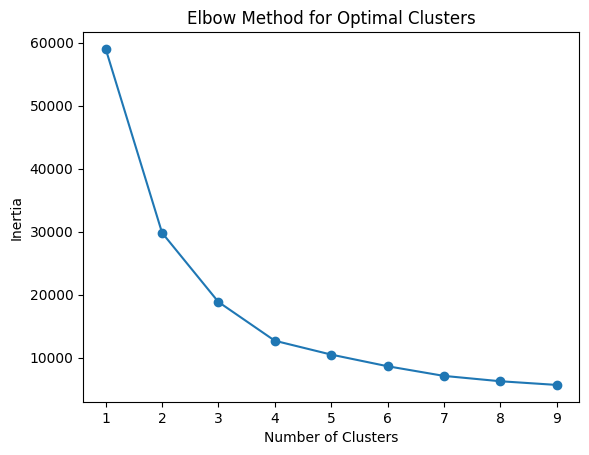

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Select relevant columns for clustering
data_subset = df[['Production Qty', 'Domestic Sale', 'Export Sale']]


# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)



# Range of potential clusters
inertia = []
cluster_range = range(1, 10)

# Calculate inertia for different numbers of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot inertia to visualize the elbow
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


In [29]:
# Set the optimal number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_subset.loc[:, 'Cluster'] = kmeans.fit_predict(data_scaled)

# Calculate distances to cluster centers to identify anomalies
distances = kmeans.transform(data_scaled).min(axis=1)
data_subset.loc[:, 'Distance_to_Center'] = distances

# Define an anomaly threshold (e.g., top 5% furthest distances)
threshold = data_subset['Distance_to_Center'].quantile(0.95)
data_subset.loc[:, 'Anomaly'] = data_subset['Distance_to_Center'] > threshold

# Display the results with potential anomalies flagged
data_subset[data_subset['Anomaly'] == True]

/tmp/ipykernel_921813/731051395.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_921813/731051395.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_921813/731051395.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Production Qty  Domestic Sale  Export Sale  Cluster  \
1625                0          17842            0        1   
1653                0           7321            0        0   
1511                0           6582            0        0   
1488                0           8205            0        0   
1552                0          10597            0        1   
...               ...            ...          ...      ...   
18850            8289            486        12001        2   
18841            5820           5539         1871        1   
18843           15855          15489          910        1   
18658            5328             25         9237        2   
18617           13621          13658            3        1   

       Distance_to_Center  Anomaly  
1625             4.660161     True  
1653             2.547176     True  
1511             2.270962     True  
1488             2.877801     True  
1552             3.453824     True  
...                   ...      ...  
18850            7.180977     True  
18841            2.308373     True  
18843            3.052530     True  
18658            4.322725     True  
18617            2.179694     True  

[984 rows x 6 columns]

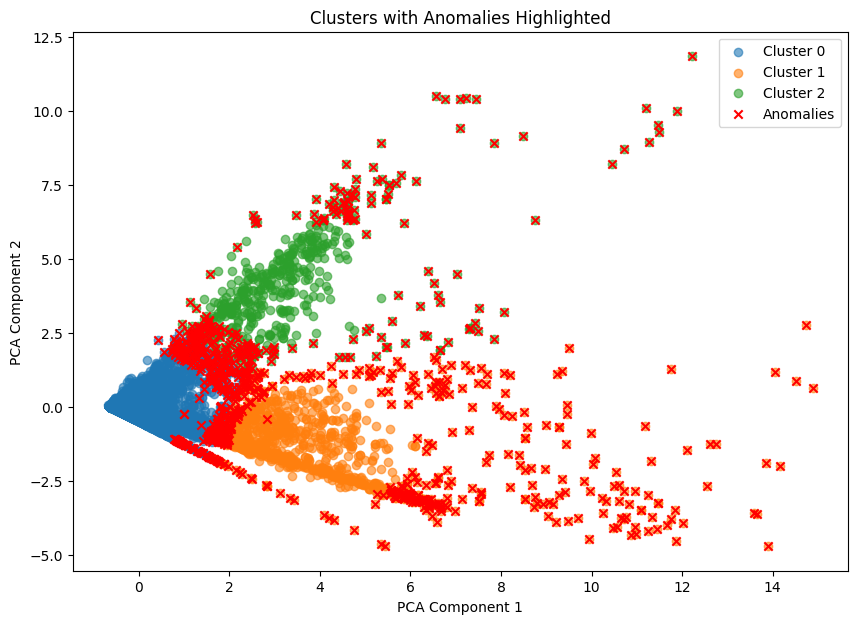

In [30]:
# Reduce dimensions to 2D using PCA for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)

# Plot clusters and highlight anomalies
plt.figure(figsize=(10, 7))
for cluster in range(optimal_k):
    plt.scatter(
        data_2d[data_subset['Cluster'] == cluster, 0],
        data_2d[data_subset['Cluster'] == cluster, 1],
        label=f'Cluster {cluster}',
        alpha=0.6
    )
plt.scatter(
    data_2d[data_subset['Anomaly'], 0],
    data_2d[data_subset['Anomaly'], 1],
    color='red',
    marker='x',
    label='Anomalies'
)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters with Anomalies Highlighted')
plt.legend()
plt.show()

## Insights

In [31]:
import plotly.graph_objects as go

# Convert YrMth to datetime format for time series plotting
df['YrMth'] = pd.to_datetime(df['YrMth'], format='%d-%m-%Y')

# Aggregating data by YrMth for overall monthly trends
monthly_data = df.groupby('YrMth').sum().reset_index()

# Create the figure
fig = go.Figure()

# Add Production Qty trace
fig.add_trace(go.Scatter(
    x=monthly_data['YrMth'],
    y=monthly_data['Production Qty'],
    mode='lines+markers',
    name='Production Qty',
    line=dict(color='blue'),
    marker=dict(size=6)
))

# Add Domestic Sale trace
fig.add_trace(go.Scatter(
    x=monthly_data['YrMth'],
    y=monthly_data['Domestic Sale'],
    mode='lines+markers',
    name='Domestic Sale',
    line=dict(color='green'),
    marker=dict(size=6)
))

# Add Export Sale trace
fig.add_trace(go.Scatter(
    x=monthly_data['YrMth'],
    y=monthly_data['Export Sale'],
    mode='lines+markers',
    name='Export Sale',
    line=dict(color='red'),
    marker=dict(size=6)
))

# Update layout for beautiful visualization
fig.update_layout(
    title='Monthly Production and Sales Overview',
    xaxis_title='Date',
    yaxis_title='Quantity',
    hovermode='x unified',
    legend=dict(
        x=0.01,
        y=0.99,
        bgcolor='rgba(0,0,0,0)',
        bordercolor='rgba(0,0,0,0)'
    )
)

# Show the plot
fig.show()

In [32]:
import plotly.express as px

# Calculating the segment distribution for SIAM Segment 1
segment_distribution = df['SIAM Segment 1'].value_counts().reset_index()
segment_distribution.columns = ['Segment', 'Count']

# Plotting the market segmentation by SIAM Segment 1 using Plotly
fig = px.pie(
    segment_distribution,
    names='Segment',
    values='Count',
    title='Market Segmentation by SIAM Segment 1',
    color='Segment',
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [33]:
# Calculating the distribution of fuel types
fuel_distribution = df['SIAM Fuel'].value_counts().reset_index()
fuel_distribution.columns = ['Fuel Type', 'Count']

# Plotting the fuel type distribution using Plotly
fig = px.bar(
    fuel_distribution,
    x='Fuel Type',
    y='Count',
    title='Fuel Type Distribution',
    color='Fuel Type',
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_layout(
    xaxis_title='Fuel Type',
    yaxis_title='Count of Vehicles',
    xaxis_tickangle=45
)

fig.show()

In [34]:
# Reset index to use 'Date' as a column
monthly_data_reset = monthly_data.reset_index()
monthly_data_reset = monthly_data_reset.rename(columns={'index': 'Date'})

# Plotting Domestic vs. Export Sales by Month using Plotly
fig = px.bar(
    monthly_data_reset,
    x='Date',
    y=['Domestic Sale', 'Export Sale'],
    title='Domestic vs. Export Sales by Month',
    labels={'value': 'Quantity of Vehicles Sold', 'Date': 'Date'},
    barmode='stack',
    color_discrete_sequence=px.colors.qualitative.Vivid
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Quantity of Vehicles Sold',
    legend_title='Sales Type',
    xaxis_tickangle=-45,
    template='plotly_white'
)

fig.show()

In [35]:
# Aggregating data by SIAM Segment 1 for export sales analysis
segment_sales = df.groupby('SIAM Segment 1')[['Domestic Sale', 'Export Sale']].sum().reset_index()

# Plotting the export sale proportion by vehicle segment using Plotly
fig = px.bar(
    segment_sales,
    x='SIAM Segment 1',
    y=['Domestic Sale', 'Export Sale'],
    title='Export Sale Proportion by Vehicle Segment',
    labels={
        'SIAM Segment 1': 'Vehicle Segment',
        'value': 'Total Sales Count',
        'variable': 'Sales Type'
    },
    barmode='stack',
    color_discrete_sequence=px.colors.qualitative.Vivid
)

fig.update_layout(
    xaxis_title='Vehicle Segment',
    yaxis_title='Total Sales Count',
    legend_title='Sales Type',
    xaxis_tickangle=45,
    template='plotly_white',
    plot_bgcolor='rgba(0,0,0,0)',
    yaxis=dict(gridcolor='lightgrey')
)

fig.show()

In [36]:
import plotly.express as px
import pandas as pd

# Filtering top segments for focused analysis
top_segments = df['SIAM Segment 1'].value_counts().index[:3]  # Taking the top 3 segments

# Preparing data by segment and time for production and domestic sales trends
segment_trend_data = df[df['SIAM Segment 1'].isin(top_segments)]
segment_trends = segment_trend_data.groupby(['YrMth', 'SIAM Segment 1'])[['Production Qty', 'Domestic Sale']].sum().reset_index()

# Melt the dataframe for Plotly
melted_trends = segment_trends.melt(id_vars=['YrMth', 'SIAM Segment 1'], value_vars=['Production Qty', 'Domestic Sale'],
                                    var_name='Sales Type', value_name='Quantity')

# Plotting production and domestic sales by segment over time using Plotly
fig = px.line(
    melted_trends,
    x='YrMth',
    y='Quantity',
    color='SIAM Segment 1',
    line_dash='Sales Type',
    title='Production and Domestic Sales by Segment Over Time',
    labels={
        'YrMth': 'Date',
        'Quantity': 'Quantity of Vehicles',
        'SIAM Segment 1': 'Vehicle Segment'
    },
    markers=True
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Quantity of Vehicles',
    legend_title='Segment and Sales Type',
    template='plotly_white',
    hovermode='x unified'
)

fig.update_xaxes(tickangle=45)

fig.show()

In [37]:
import plotly.express as px

# Aggregating sales data by OEM Model Name
top_models = df.groupby('OEM Model Name')[['Domestic Sale', 'Export Sale']].sum()
top_models['Total Sales'] = top_models['Domestic Sale'] + top_models['Export Sale']
top_5_models = top_models.nlargest(5, 'Total Sales').reset_index()

# Plotting the model-level analysis for top 5 vehicle models using Plotly
fig = px.bar(
    top_5_models,
    x='OEM Model Name',
    y=['Domestic Sale', 'Export Sale'],
    title='Model-Level Analysis of Top 5 Vehicle Models',
    labels={
        'OEM Model Name': 'Vehicle Model',
        'value': 'Quantity of Vehicles Sold',
        'variable': 'Sales Type'
    },
    barmode='stack',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(
    xaxis_title='Vehicle Model',
    yaxis_title='Quantity of Vehicles Sold',
    legend_title='Sales Type',
    xaxis_tickangle=45,
    template='plotly_white',
    plot_bgcolor='rgba(0,0,0,0)',
    yaxis=dict(gridcolor='lightgrey')
)

fig.show()

In [38]:
# Calculating the total sales (Domestic + Export) for comparison with Production Qty
monthly_data['Total Sales'] = monthly_data['Domestic Sale'] + monthly_data['Export Sale']

# Reset index to use 'Date' as a column
monthly_data_reset = monthly_data.reset_index().rename(columns={'index': 'Date'})

# Plotting the production vs. sales gap analysis using Plotly
fig = px.line(
    monthly_data_reset,
    x='Date',
    y=['Production Qty', 'Total Sales'],
    title='Production vs. Sales Gap Analysis Over Time',
    labels={
        'Date': 'Date',
        'value': 'Quantity of Vehicles',
        'variable': 'Metric'
    },
    markers=True,
    color_discrete_sequence=px.colors.qualitative.Vivid
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Quantity of Vehicles',
    legend_title='Metrics',
    xaxis_tickangle=45,
    template='plotly_white',
    plot_bgcolor='rgba(0,0,0,0)',
    yaxis=dict(gridcolor='lightgrey')
)

fig.show()

In [39]:
# Aggregating data by category for production and domestic sales comparison
category_balance = df.groupby('Category')[['Production Qty', 'Domestic Sale']].sum().reset_index()

# Plotting the vehicle category demand balance using Plotly
fig = px.scatter(
    category_balance,
    x='Production Qty',
    y='Domestic Sale',
    text='Category',
    size_max=15,
    title='Vehicle Category Demand Balance',
    labels={
        'Production Qty': 'Production Quantity',
        'Domestic Sale': 'Domestic Sale'
    },
    color='Category',
    hover_data={'Category': True, 'Production Qty': True, 'Domestic Sale': True},
    color_discrete_sequence=px.colors.qualitative.Vivid
)

# Updating layout for better visualization
fig.update_traces(textposition='top center', marker=dict(size=12, opacity=0.7))
fig.update_layout(
    xaxis=dict(title='Production Quantity', gridcolor='lightgrey'),
    yaxis=dict(title='Domestic Sale', gridcolor='lightgrey'),
    template='plotly_white'
)

fig.show()

In [40]:
# Calculating yearly total domestic and export sales
yearly_sales = df.groupby('Year')[['Domestic Sale', 'Export Sale']].sum()

# Calculating year-over-year growth percentage
yearly_growth = yearly_sales.pct_change() * 100

# Reset index for plotting
yearly_growth = yearly_growth.reset_index()

# Melt the dataframe for Plotly
yearly_growth_melted = yearly_growth.melt(id_vars='Year', value_vars=['Domestic Sale', 'Export Sale'],
                                           var_name='Sale Type', value_name='Growth Percentage')

# Create grouped bar chart
fig = px.bar(yearly_growth_melted, x='Year', y='Growth Percentage', color='Sale Type',
             barmode='group', title='Yearly Growth in Domestic vs. Export Sales',
             labels={'Growth Percentage': 'Growth Percentage (%)', 'Year': 'Year'})

# Customize layout
fig.update_layout(yaxis=dict(gridcolor='lightgray'))

# Show the plot
fig.show()

In [41]:
# Calculating yearly fuel type distribution as a proportion of total
fuel_trends = df.groupby(['Year', 'SIAM Fuel'])['Vehicle Code'].count().unstack().fillna(0)
fuel_proportion = fuel_trends.div(fuel_trends.sum(axis=1), axis=0) * 100  # Convert to percentage

# Reset index for Plotly
fuel_proportion = fuel_proportion.reset_index()

# Melt the DataFrame for Plotly
fuel_melted = fuel_proportion.melt(id_vars='Year', var_name='Fuel Type', value_name='Proportion')

# Plotting the fuel type shift over time using Plotly
fig = px.area(fuel_melted, x='Year', y='Proportion', color='Fuel Type',
              title='Fuel-Type Shift Over Time',
              labels={'Proportion': 'Proportion of Fuel Type (%)'},
              hover_data=['Fuel Type', 'Proportion'],
              height=600)

fig.update_layout(xaxis_title='Year',
                  yaxis_title='Proportion of Fuel Type (%)',
                  legend_title='Fuel Type',)

fig.show()

In [42]:
# Calculating the average proportion of each fuel type within each segment
segment_fuel = df.groupby(['SIAM Segment 1', 'SIAM Fuel'])['Vehicle Code'].count().unstack().fillna(0)
segment_fuel_proportion = segment_fuel.div(segment_fuel.sum(axis=1), axis=0) * 100  # Convert to percentage

# Reset index for Plotly
segment_fuel_proportion = segment_fuel_proportion.reset_index()

# Melt the DataFrame for Plotly
segment_fuel_melted = segment_fuel_proportion.melt(id_vars='SIAM Segment 1', 
                                                  var_name='Fuel Type', 
                                                  value_name='Proportion')

# Plotting the fuel efficiency insights by segment using Plotly
fig = px.bar(segment_fuel_melted,
             x='SIAM Segment 1',
             y='Proportion',
             color='Fuel Type',
             title='Fuel Efficiency Insights by Segment',
             labels={'Proportion': 'Proportion of Fuel Type (%)', 
                     'SIAM Segment 1': 'Vehicle Segment'},
             height=600,)

fig.update_layout(barmode='stack',
                  legend_title='Fuel Type')

fig.show()

In [43]:
# Aggregating total sales (Domestic + Export) by category
category_sales = df.groupby('Category')[['Domestic Sale', 'Export Sale']].sum().sum(axis=1).reset_index()
category_sales.columns = ['Category', 'Total Sales']

# Plotting the total sales by category as a pie chart
fig = px.pie(category_sales, 
             values='Total Sales', 
             names='Category',
             title='Total Sales by Category',
             color='Category',
             color_discrete_sequence=px.colors.qualitative.Vivid)

# Customize text inside the pie slices
fig.update_traces(textposition='inside', textinfo='percent+label')

# Display the plot
fig.show()

In [44]:
import plotly.express as px

# Creating a cross-tabulation of Category Name and SIAM Segment 1 to analyze overlap
category_segment_overlap = pd.crosstab(df['Category Name'], df['SIAM Segment 1'])

# Creating the heatmap using Plotly
fig = px.imshow(category_segment_overlap,
                labels=dict(x="SIAM Segment 1", y="Category Name", color="Count"),
                x=category_segment_overlap.columns,
                y=category_segment_overlap.index,
                color_continuous_scale='Turbo',
                title='Category Name and Segment Overlap Analysis',
                text_auto=True)

# Update layout for better aesthetics
fig.update_layout(
    xaxis_title='SIAM Segment 1',
    yaxis_title='Category Name',
    title_x=0.5,
)

# Display the plot
fig.show()

## ML Prediction

### Predict Future Vehicle Sales (Time Series Forecasting)

1. **Predict Future Vehicle Sales (Time Series Forecasting)**
   - **Objective**: Forecast future sales (e.g., monthly domestic and export sales) based on historical sales data.
   - **Algorithms**:
     - **ARIMA/SARIMA**: Good for univariate time series with seasonal patterns.
     - **Prophet**: Effective for time series with multiple seasonalities and holiday effects.
     - **LSTM (Long Short-Term Memory Networks)**: Suitable for capturing complex time dependencies in sequences, especially with large datasets.

2. **Segment Popularity Prediction (Classification)**
   - **Objective**: Predict which vehicle segment (e.g., Mini, Compact, SUV) is likely to be popular based on factors like year, fuel type, and production quantity.
   - **Algorithms**:
     - **Random Forest or Decision Trees**: Useful for understanding feature importance and handling categorical data.
     - **Logistic Regression**: Simple, interpretable model that works well if the relationships are linear.
     - **XGBoost**: A robust classifier that generally performs well on tabular data with categorical features.

3. **Vehicle Production Optimization (Regression)**
   - **Objective**: Predict optimal production quantity based on factors like segment type, previous sales, export trends, and fuel type to meet demand without excess.
   - **Algorithms**:
     - **Linear Regression or Ridge Regression**: For straightforward relationships between input factors and production quantity.
     - **Gradient Boosting Regressor (XGBoost/LightGBM)**: Effective for non-linear relationships and managing categorical variables.
     - **Neural Networks (MLP Regressor)**: Can capture complex relationships in larger datasets.

4. **Identify Market Demand for New Models (Clustering)**
   - **Objective**: Cluster vehicle models or segments based on features like production quantity, sales, fuel type, and segment, to identify gaps in the market or new opportunities.
   - **Algorithms**:
     - **K-Means Clustering**: Quick, interpretable clustering technique for finding similar groups within the data.
     - **DBSCAN (Density-Based Clustering)**: Useful for clustering data with noise or outliers.
     - **Hierarchical Clustering**: Allows understanding of data structure and subgroup relationships without predefined cluster counts.

5. **Customer Preference Prediction for Fuel Type (Classification)**
   - **Objective**: Predict which fuel type (e.g., Petrol, Diesel, Electric) will be most in-demand, based on historical trends and segment.
   - **Algorithms**:
     - **Logistic Regression**: Good starting point for binary or multi-class predictions.
     - **Support Vector Machine (SVM)**: Effective in handling complex relationships for smaller datasets.
     - **Random Forest or XGBoost**: Handles both classification tasks and feature importance, making it useful in tabular datasets.

6. **Anomaly Detection in Sales and Production Data**
   - **Objective**: Detect anomalies in production and sales quantities that might indicate unusual trends or reporting errors.
   - **Algorithms**:
     - **Isolation Forest**: Good for high-dimensional data where anomalies are rare and distinctly different.
     - **Autoencoders (Deep Learning)**: Effective for high-dimensional, sequential data, learning to reconstruct "normal" patterns and flagging deviations.
     - **Local Outlier Factor (LOF)**: Measures local density and compares with neighboring points to identify outliers in data.

### Predict Future Vehicle Sales (Time Series Forecasting)

> Things to consider before building the ML model from the above analysis -

- `Year` ranges from 2012 to 2019.
- Production, domestic sales, and export sales quantities have extreme minimum values (e.g., some negative values in Production Qty and Domestic Sale), which might indicate data entry errors.
- Maximum values are notably high, suggesting outliers or possibly a skew in production and sales quantities.

> Time series analysis before prediction:

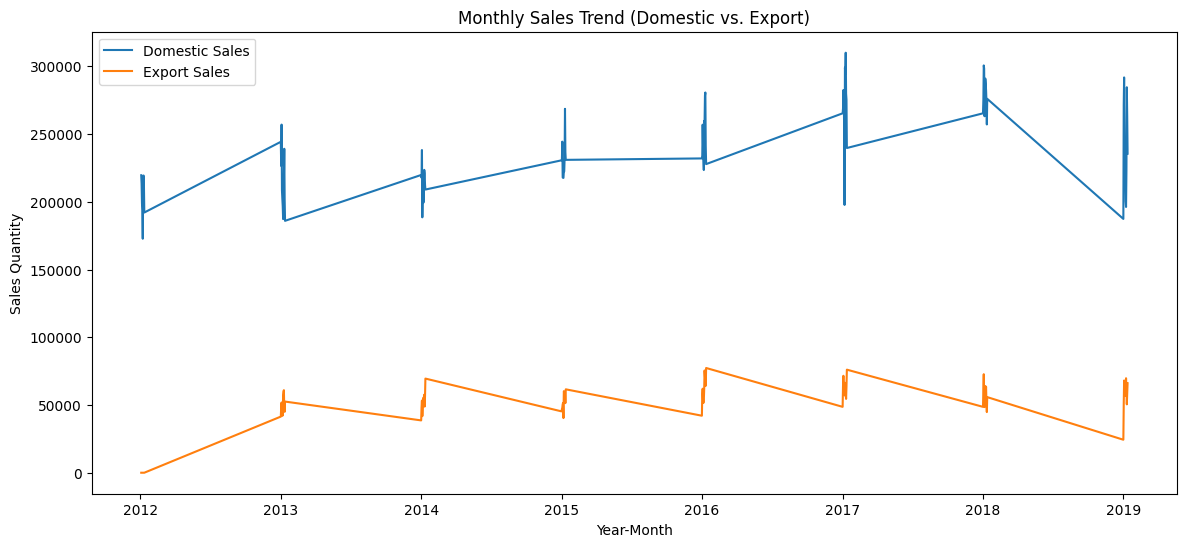

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'YrMth' to datetime format for time series analysis
df['YrMth'] = pd.to_datetime(df['YrMth'], errors='coerce')

# Removing potential erroneous negative values in sales data
df_cleaned = df[(df['Domestic Sale'] >= 0) & (df['Export Sale'] >= 0)]

# Group data by 'YrMth' to get monthly sales totals
monthly_sales = df_cleaned.groupby('YrMth')[['Domestic Sale', 'Export Sale']].sum()

# Plotting the overall sales trend
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales.index, monthly_sales['Domestic Sale'], label='Domestic Sales')
plt.plot(monthly_sales.index, monthly_sales['Export Sale'], label='Export Sales')
plt.title('Monthly Sales Trend (Domestic vs. Export)')
plt.xlabel('Year-Month')
plt.ylabel('Sales Quantity')
plt.legend()
plt.show()

> Visualizing seasonality patterns and check for stationarity

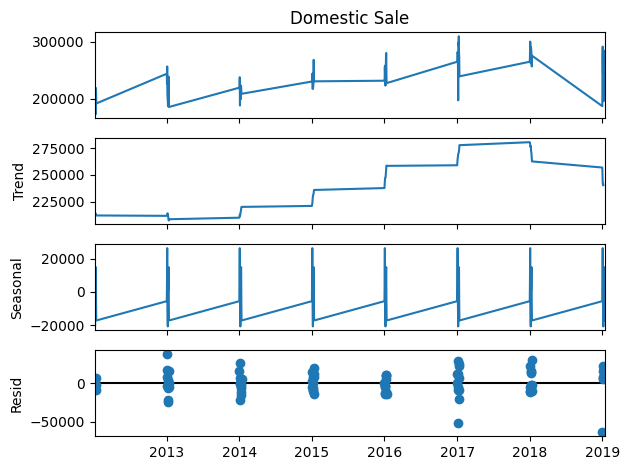

(np.float64(-1.084367149577949),
 np.float64(0.7212656733633788),
 12,
 80,
 {'1%': np.float64(-3.5148692050781247),
  '5%': np.float64(-2.8984085156250003),
  '10%': np.float64(-2.58643890625)},
 np.float64(1842.1273627668782))

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Decompose the domestic sales to analyze seasonality (assuming monthly frequency)
domestic_sales_ts = monthly_sales['Domestic Sale']
decomposition = seasonal_decompose(domestic_sales_ts, model='additive', period=12)

# Plot the decomposed components: trend, seasonality, and residual
decomposition.plot()
plt.show()

# Perform the Augmented Dickey-Fuller test to check for stationarity
adf_test_result = adfuller(domestic_sales_ts.dropna())

# Display ADF test results
adf_test_result


The seasonality decomposition for domestic sales reveals three components:

1. **Trend**: Displays the underlying direction over time.
2. **Seasonality**: Indicates a repeating pattern every 12 months, suggesting monthly seasonality in sales.
3. **Residuals**: Shows irregular fluctuations.

The **Augmented Dickey-Fuller (ADF) Test** results indicate the following:

- **Test Statistic**: -1.084
- **p-value**: 0.721
- **Critical Values**: 1%: -3.515, 5%: -2.898, 10%: -2.586

With a p-value above 0.05, we fail to reject the null hypothesis of non-stationarity, indicating that the domestic sales time series is likely non-stationary. This implies a need for differencing or transformation if modeling is intended.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from itertools import product
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Convert the 'YrMth' column to datetime format
df['YrMth'] = pd.to_datetime(df['YrMth'], format='%d-%m-%Y')

# Aggregate data by summing up 'Domestic Sale' for each month in 'SIAM Segment 1'
segment_sales = df.groupby('YrMth')['Domestic Sale'].sum().reset_index()
segment_sales = segment_sales.sort_values('YrMth').set_index('YrMth')


In [48]:

# Step 1: Make the time series stationary
# Apply differencing as needed to make the series stationary
diff_sales = segment_sales['Domestic Sale'].diff().dropna()
if adfuller(diff_sales)[1] > 0.05:
    diff_sales = diff_sales.diff().dropna()


In [49]:

# Step 2: Optimize SARIMA parameters with grid search
# Define parameter ranges for grid search
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
s = 12  # Seasonality for monthly data

# Generate all possible parameter combinations
parameter_combinations = list(product(p, d, q, P, D, Q))

# Grid search for the best parameter combination using AIC
best_aic = float("inf")
best_params = None
for params in parameter_combinations:
    try:
        (p, d, q, P, D, Q) = params
        model = SARIMAX(segment_sales['Domestic Sale'], order=(p, d, q), seasonal_order=(P, D, Q, s))
        result = model.fit(disp=False)
        if result.aic < best_aic:
            best_aic = result.aic
            best_params = (p, d, q, P, D, Q)
    except:
        continue

# Extract best parameters
best_p, best_d, best_q, best_P, best_D, best_Q = best_params


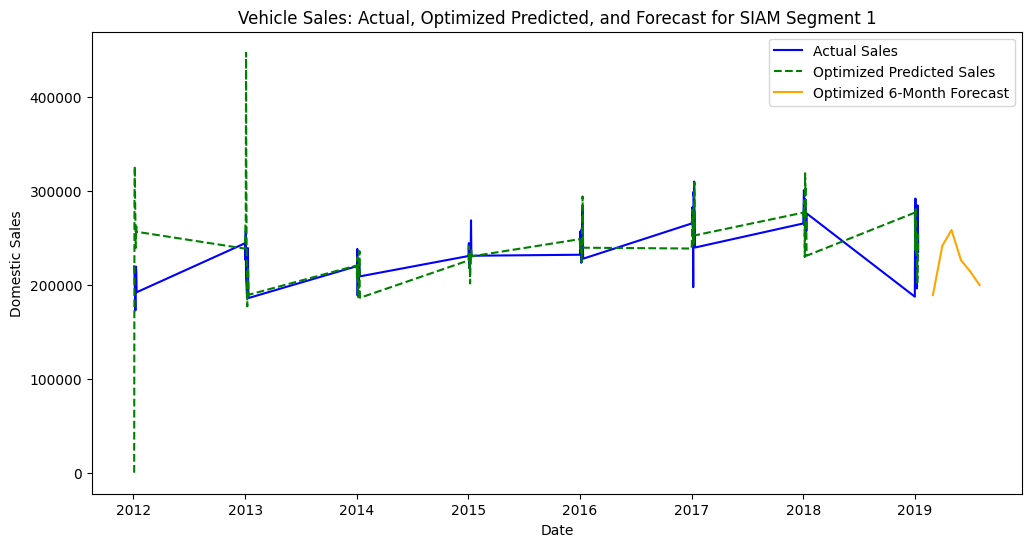

In [50]:

# Step 3: Fit the optimized SARIMA model
optimized_model = SARIMAX(segment_sales['Domestic Sale'], order=(best_p, best_d, best_q), seasonal_order=(best_P, best_D, best_Q, s))
optimized_result = optimized_model.fit(disp=False)

# Step 4: Forecast the next 6 months
forecast_steps = 6
forecast = optimized_result.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
forecast_index = pd.date_range(segment_sales.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')

# Step 5: Plot actual, predicted, and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(segment_sales, label='Actual Sales', color='blue')
optimized_predicted_in_sample = optimized_result.predict(start=0, end=len(segment_sales)-1)
plt.plot(segment_sales.index, optimized_predicted_in_sample, label='Optimized Predicted Sales', color='green', linestyle='--')
plt.plot(forecast_index, forecast_values, label='Optimized 6-Month Forecast', color='orange')
plt.title('Vehicle Sales: Actual, Optimized Predicted, and Forecast for SIAM Segment 1')
plt.xlabel('Date')
plt.ylabel('Domestic Sales')
plt.legend()
plt.show()
